
### Описание датасета (из документации):
*This database encodes the complete set of possible board configurations
at the end of tic-tac-toe games, where "x" is assumed to have played
first.  The target concept is "win for x" (i.e., true when "x" has one
of 8 possible ways to create a "three-in-a-row").*

*Attribute Information: (x=player x has taken, o=player o has taken, b=blank)*

    1. top-left-square: {x,o,b}
    2. top-middle-square: {x,o,b}
    3. top-right-square: {x,o,b}
    4. middle-left-square: {x,o,b}
    5. middle-middle-square: {x,o,b}
    6. middle-right-square: {x,o,b}
    7. bottom-left-square: {x,o,b}
    8. bottom-middle-square: {x,o,b}
    9. bottom-right-square: {x,o,b}
    10. Class: {positive,negative}

# Part 1, exploratory data analysis (EDA)

Вопросы:

1. [1 балл] Загрузите датасет, указав, что header равен None, так как первая строка не является строкой с названиями переменных. Посмотрите на начало датасета при помощи `.head()`. 
2. [1 балл] Похоже, нужно основательно поработать с датасетом, так как нет ни названий столбцов, ни нормальных числовых переменных. Давайте начнем со столюцов - переименуйте их на 'topleft', 'topmiddle', 'topright','middleleft', 'middlemiddle', 'middleright','bottomleft', 'bottommiddle', 'bottomright','Class' (именно в таком порядке) и снова посмотрите на начало датасета.
3. [3 балла] Отлично, теперь стало уже приятнее, но по-прежнему беда с переменными. Давайте их все перекодируем в числа. Задайте в качестве иксов единички, пустым значениям поставьте в соответствие нолики, а нолики замените на минус единички. Аналогично поработаем с целевой переменной - Class, которая отвечает за победу или поражение крестиков. В качестве positive поставьте единички, а negative - нули.
4. [1 балл] Наконец, после всех этих преобразований, посчитайте, сколько в датасете случаев, когда крестики проиграли, а также воспользуйтесь функцией describe() для отображения базовых статистик переменных.
5. [2 балла] В какую клетку чаще всего ставят крестики? Подсказка - это можно подсчитать при помощи count(), примененному к соответствующему срезу датасета. А какая клетка чаще всего оказывается не пустой на доске? (То есть в датасете в этом столбце реже всего встречается пустое значение - ноль)
6. [1 балл] Визуализация - при помощи функции plotBoard постройте по несколько примеров для случаев, когда победили крестики, и когда победили нолики
7. [1 балл] Вопрос-сюрприз! Попробуйте самостоятельно придумать какой-нибудь осмысленный вопрос или визуализацию для вашего датасета. Инициатива не наказуема, так что удивите меня ;)


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') 
%matplotlib inline


In [2]:
tic = pd.read_csv('./egorova_tic-tac-toe.txt', header = None)

In [3]:
tic.head()

,0,1,2,3,4,5,6,7,8,9
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [4]:
names = ['topleft',
 'topmiddle',
 'topright',
 'middleleft',
 'middlemiddle',
 'middleright',
 'bottomleft',
 'bottommiddle',
 'bottomright',
 'Class']

dict(enumerate(names))

{0: 'topleft',
 1: 'topmiddle',
 2: 'topright',
 3: 'middleleft',
 4: 'middlemiddle',
 5: 'middleright',
 6: 'bottomleft',
 7: 'bottommiddle',
 8: 'bottomright',
 9: 'Class'}

In [5]:
tic.rename(columns=dict(enumerate(names)), inplace=True)

In [6]:
tic.head()

,topleft,topmiddle,topright,middleleft,middlemiddle,middleright,bottomleft,bottommiddle,bottomright,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [7]:
tic[tic=='x'] = 1
tic[tic=='b'] = 0
tic[tic=='o'] = -1
tic[tic=='positive'] = 1
tic[tic=='negative'] = 0


In [8]:
tic.head()

,topleft,topmiddle,topright,middleleft,middlemiddle,middleright,bottomleft,bottommiddle,bottomright,Class
0,1,1,1,1,-1,-1,1,-1,-1,1
1,1,1,1,1,-1,-1,-1,1,-1,1
2,1,1,1,1,-1,-1,-1,-1,1,1
3,1,1,1,1,-1,-1,-1,0,0,1
4,1,1,1,1,-1,-1,0,-1,0,1


In [9]:
tic['Class'].value_counts()

1    626
0    332
Name: Class, dtype: int64

In [10]:
tic.describe()

,topleft,topmiddle,topright,middleleft,middlemiddle,middleright,bottomleft,bottommiddle,bottomright,Class
count,958,958,958,958,958,958,958,958,958,958
unique,3,3,3,3,3,3,3,3,3,2
top,1,1,1,1,1,1,1,1,1,1
freq,418,378,418,378,458,378,418,378,418,626


In [11]:
tic[tic==1].count()


topleft         418
topmiddle       378
topright        418
middleleft      378
middlemiddle    458
middleright     378
bottomleft      418
bottommiddle    378
bottomright     418
Class           626
dtype: int64

In [12]:
#В клетку middlemiddle крестик ставили чаще всего!

In [13]:
tic[tic!=0].count()

topleft         753
topmiddle       708
topright        753
middleleft      708
middlemiddle    798
middleright     708
bottomleft      753
bottommiddle    708
bottomright     753
Class           626
dtype: int64

In [14]:
#Клетка middlemiddle чаще всего была не пустая!

In [60]:
def plotBoard(row_number, ax, markersize=50, title=True):
    
    board =  tic.iloc[row_number]
    # positions for ticks and toes
    coords = {
        'topleft': (0.5, 2.5),
        'topmiddle':(1.5, 2.5),
        'topright':(2.5, 2.5),
        'middleleft':(0.5, 1.5),
        'middlemiddle':(1.5, 1.5),
        'middleright':(2.5, 1.5),
        'bottomleft':(0.5, 0.5),
        'bottommiddle':(1.5, 0.5),
        'bottomright':(2.5, 0.5)
    }
    
    # draw the grid
    for x in range(4):
        ax.plot([x, x], [0,3], 'k')
    for y in range(4):
        ax.plot([0, 3], [y,y], 'k')


    # get rid of axes and everything (the figure background will show through)
    ax.set_axis_off()

    # scale the plot area 
    ax.set_xlim(0,3)
    ax.set_ylim(0,3)

    # iteratively fill the board
    for index, value in board[:-1].items():
        if value == 1:
            ax.plot(*coords[index],'X',markersize=markersize, markeredgecolor=(0,0,0), markerfacecolor='black', markeredgewidth=2)
        elif value == -1:
            ax.plot(*coords[index],'o',markersize=markersize, markeredgecolor=(0,0,0), markerfacecolor='w', markeredgewidth=2)
    
    if title:
        if board[-1] == 1:
            ax.set_title("Победили крестики")
        else:
            ax.set_title("Победили нолики")

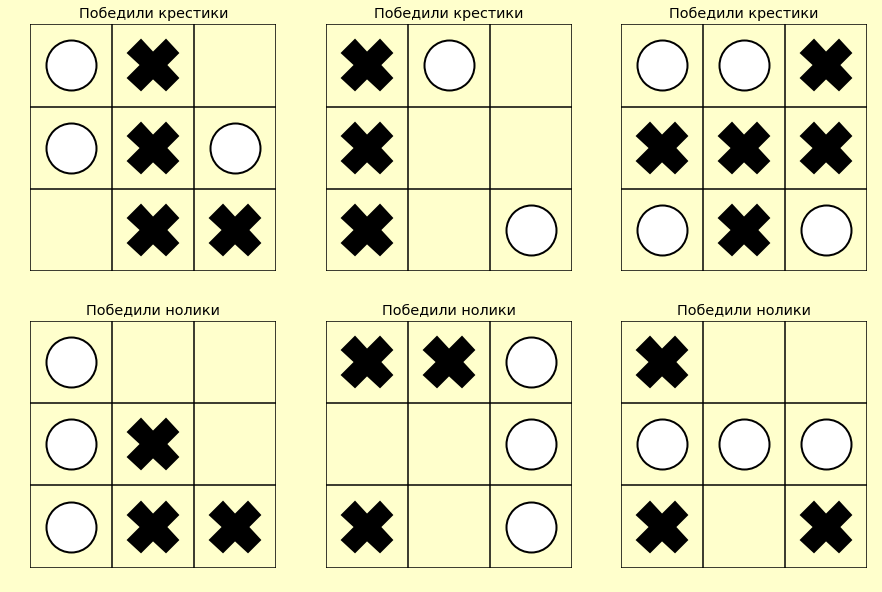

In [249]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.patch.set_facecolor((1,1,.8))

set1 = tic[tic['Class']==1].sample(3).index
for i in range(3):
    plotBoard(set1[i], axes[0, i])
    
set0 = tic[tic['Class']==0].sample(3).index
for i in range(3):
    plotBoard(set0[i], axes[1, i])

## Самые быстрые партии

In [250]:
count_b = tic[tic==0].iloc[:,:-1].count(axis=1)
count_b_ind = count_b[count_b==4].index
count_b_ind

Int64Index([ 33,  43,  47,  48,  49,  62,  66,  67,  68,  72,
            ...
            613, 617, 618, 619, 620, 621, 622, 623, 624, 625],
           dtype='int64', length=120)

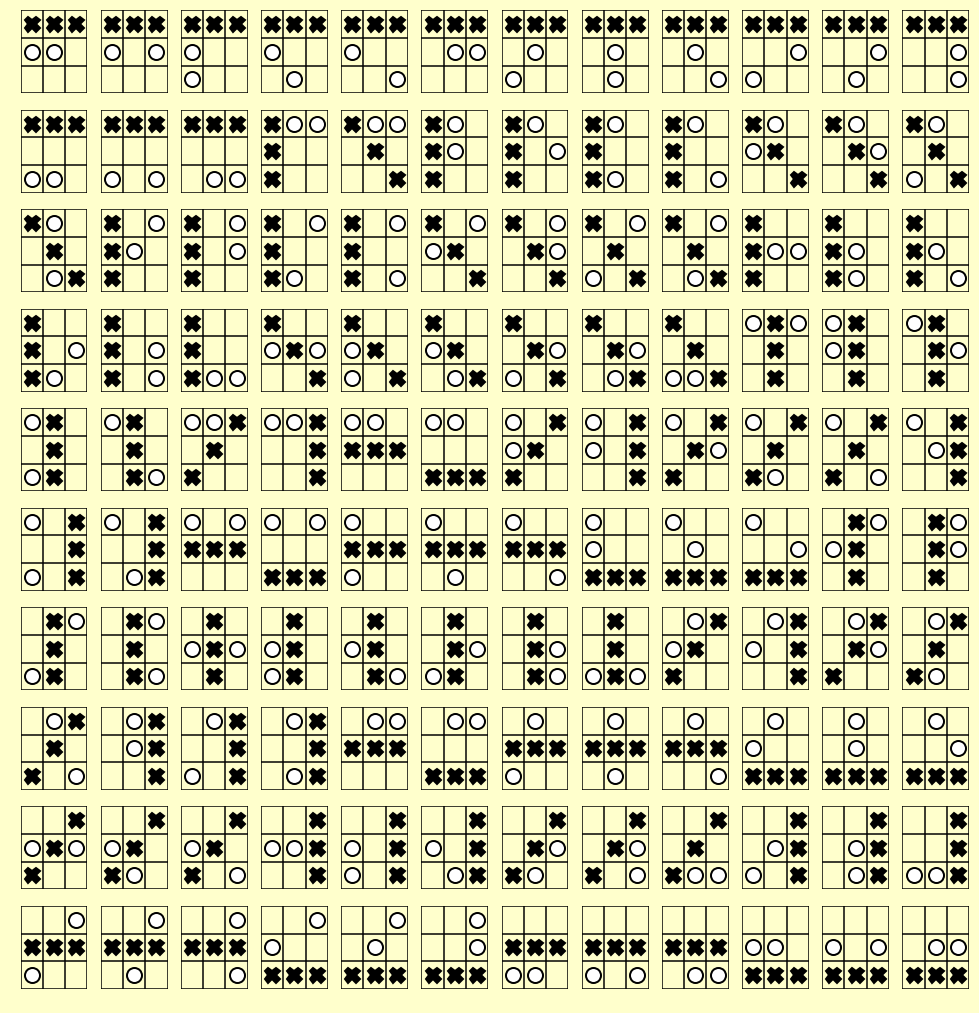

In [251]:
fig, axes = plt.subplots(10, 12, figsize=(17, 18))
fig.patch.set_facecolor((1,1,.8))
axes = axes.flatten()
for i in range(len(count_b_ind)):
    plotBoard(count_b_ind[i], axes[i], markersize=15, title=False)

Домашнее Задание 2

In [15]:
tic.isnull().sum()

topleft         0
topmiddle       0
topright        0
middleleft      0
middlemiddle    0
middleright     0
bottomleft      0
bottommiddle    0
bottomright     0
Class           0
dtype: int64

In [16]:
tic.isnull().sum()/len(tic)

topleft         0.0
topmiddle       0.0
topright        0.0
middleleft      0.0
middlemiddle    0.0
middleright     0.0
bottomleft      0.0
bottommiddle    0.0
bottomright     0.0
Class           0.0
dtype: float64

Как мы видим в моем датасете нет пропусков, поэтому и процентное соотношение пропусков равно 0

Как мне кажется, в моем датасете нет пременных, которые были бы явно связаны с целевой, поэтому никакие переменные не нужно удалять 

Так как мы знаем, что у нас нет пропусков в датасете, нам не нужно заполнять их медианой или средним

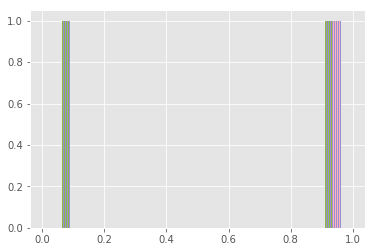

In [17]:
tic.Class.hist()

Разобъем выборку на обущающую и тестовую и оставим 30% датасета

In [18]:
D = tic['Class'].values
C = tic.drop('Class',axis=1).values
D.shape, C.shape

((958,), (958, 9))

In [19]:
from sklearn.model_selection import train_test_split

D_train, D_test, C_train, C_test = train_test_split(D, C, test_size=0.3, random_state=42)

print (D_train.shape, C_train.shape)
print (D_test.shape, C_test.shape)

(670,) (670, 9)
(288,) (288, 9)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [21]:
D_train = D_train.astype('int')
D_test = D_test.astype('int')

Для начала воспользуемся методом ближайшего соседа

In [22]:
from sklearn.neighbors import KNeighborsClassifier 

clf_knn = KNeighborsClassifier(n_neighbors=60)
clf_knn.fit(C_train, D_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=60, p=2,
           weights='uniform')

In [23]:
D_predicted = clf_knn.predict(C_test)
D_predicted

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0])

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy =', accuracy_score(D_test, D_predicted))
print('Precision =', precision_score(D_test, D_predicted))
print('Recall =', recall_score(D_test, D_predicted))
print('F1_score =', f1_score(D_test, D_predicted))

Accuracy = 0.7951388888888888
Precision = 0.7745901639344263
Recall = 0.9792746113989638
F1_score = 0.8649885583524028


In [25]:
D_probe = clf_knn.predict_proba(C_test)
D_probe[:10]

array([[0.28333333, 0.71666667],
       [0.28333333, 0.71666667],
       [0.38333333, 0.61666667],
       [0.26666667, 0.73333333],
       [0.56666667, 0.43333333],
       [0.05      , 0.95      ],
       [0.15      , 0.85      ],
       [0.46666667, 0.53333333],
       [0.33333333, 0.66666667],
       [0.53333333, 0.46666667]])

In [26]:
D_predicted = (D_probe[:,1] >= 0.6)
D_predicted[:10]

array([ True,  True,  True,  True, False,  True,  True, False,  True,
       False])

In [27]:
print('Accuracy =', accuracy_score(D_test, D_predicted))
print('Precision =', precision_score(D_test, D_predicted))
print('Recall =', recall_score(D_test, D_predicted))
print('F1_score =', f1_score(D_test, D_predicted))

Accuracy = 0.8541666666666666
Precision = 0.8756218905472637
Recall = 0.9119170984455959
F1_score = 0.8934010152284263


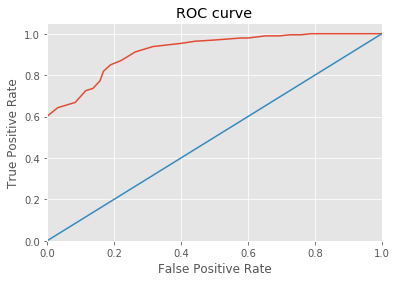

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve 
fpr, tpr, thresholds = roc_curve(D_test, D_probe[:,1])
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [29]:
# считаем площадь под кривой
print('AUC =', roc_auc_score(D_test, D_probe[:,1]))

AUC = 0.9184346877556586


У нас довольно большая площадь под кривой, следовательно наш классификатор довольно качественный

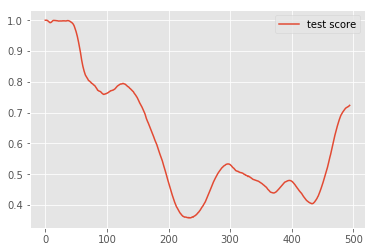

In [30]:
rocauc_train = [ ]
rocauc_test = [ ]

for k in range(5,500):
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    clf_knn.fit(C_train, D_train)
    
    # Ошибка на тестовой выборке 
    D_probe = clf_knn.predict_proba(C_test)
    rocauc_test.append(roc_auc_score(D_test, D_probe[:,1]))
    
plt.plot(rocauc_test, label='test score')
plt.legend()

In [31]:
max(rocauc_test) #Максимальное значение достигает 1 - это очень высокий показатель качетсва

1.0

Теперь попробуем сделать не одно дерево, а лес, посмотрим насколько изменятся наши показатели 

In [32]:
from sklearn.tree import DecisionTreeClassifier #прогрузили дерево

In [33]:
clf_tree = DecisionTreeClassifier()     
clf_tree.fit(C_train, D_train)          
D_predicted = clf_tree.predict(C_test)  
D_probe = clf_tree.predict_proba(C_test)

In [34]:
print('Accuracy =', accuracy_score(D_test, D_predicted))
print('Precision =', precision_score(D_test, D_predicted))
print('Recall =', recall_score(D_test, D_predicted))
print('F1_score =', f1_score(D_test, D_predicted))

Accuracy = 0.9513888888888888
Precision = 0.9637305699481865
Recall = 0.9637305699481865
F1_score = 0.9637305699481865


Показатели стали еще больше, а значит классификатор стал еще точнее

AUC = 0.9450231797109353


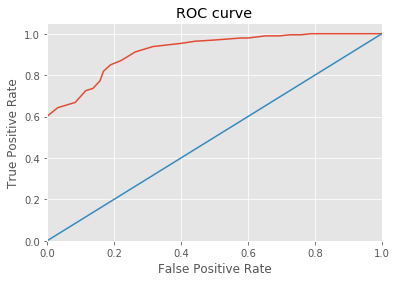

In [35]:
print('AUC =', roc_auc_score(D_test, D_probe[:,1]))

#рисуем картиночку
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [36]:
featureImportance = pd.DataFrame({"feature": tic.drop('Class',axis=1).columns, 
                                  "importance": clf_tree.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance
#На решающем дереве мы видим насколько сильно какая из переменных уменьшала ошибку при разбиении. Чем сильнее она это сделала, тем она важнее.

,importance
feature,
topright,0.156281
middleright,0.125590
middlemiddle,0.121395
bottomleft,0.120911
bottommiddle,0.116678
middleleft,0.091253
topleft,0.090893
bottomright,0.088877
topmiddle,0.088121


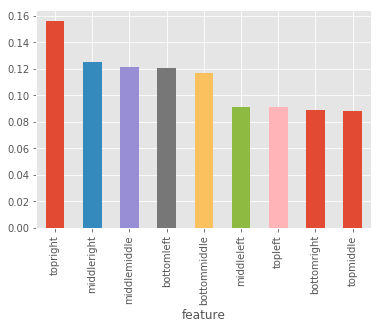

In [37]:
featureImportance["importance"].plot('bar')

Подберем оптимальное число деревьев 

In [38]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':range(5, 100), 'weights':['uniform', 'distance']}

knc = KNeighborsClassifier()

clf = GridSearchCV(knc, parameters)

clf.fit(C_train, D_train)
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')

In [39]:
D_proba = clf.predict_proba(C_test)[:,1]
print('AUC =', roc_auc_score(D_test, D_proba))

AUC = 0.998309244614126


In [40]:
from sklearn.ensemble import RandomForestClassifier #создаем лес
rfc = RandomForestClassifier(n_estimators=10) 
rfc.fit(C_train, D_train)
y_predicted = rfc.predict(C_test)
y_proba = rfc.predict_proba(C_test)

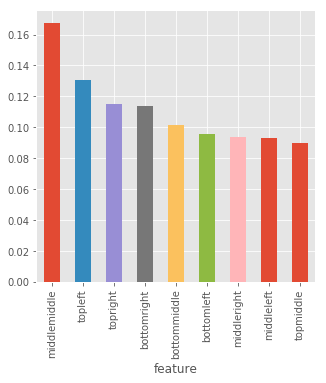

In [41]:
featureImportance = pd.DataFrame({"feature": tic.drop('Class',axis=1).columns, 
                                  "importance": rfc.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(5,5))

In [44]:
D_probe = clf.predict_proba(C_test)[:,1]
print('AUC =', roc_auc_score(D_test, D_proba))

AUC = 0.998309244614126


In [45]:
from sklearn.linear_model import LogisticRegression
# объявляем модель
logit = LogisticRegression()
# обучаем на тренировочной выборке
logit.fit(C_train, D_train)
# предсказываем вероятности
logit.predict_proba(C_test)
# предсказываем сами метки классов
logit.predict(C_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0])

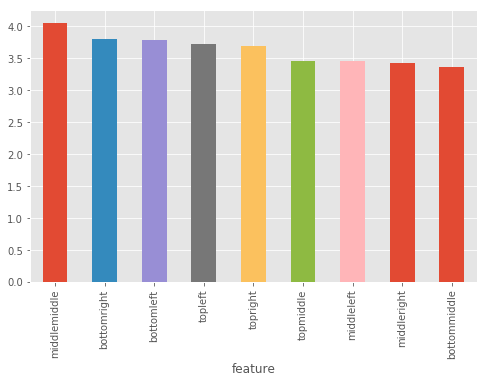

In [46]:
featureImportance = pd.DataFrame({"feature": tic.drop('Class',axis=1).columns, 
"importance": logit.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].head(30).plot('bar', figsize=(8,5))
featureImportance["importance"].tail(30).plot('bar', figsize=(8,5))

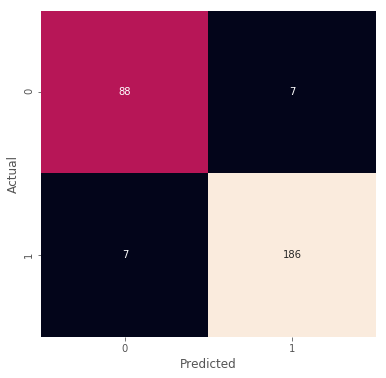

In [47]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix 
array = confusion_matrix(D_test, D_predicted) 
df_cm = pd.DataFrame(array) 
plt.figure(figsize = (6,6)) 
sns.heatmap(df_cm, annot=True, fmt='g', cbar=False) 
plt.ylabel("Actual") 
plt.xlabel("Predicted");